#    Proiect licenta v. 1
##   Toate circuitele, algoritmii si testele 
### Fara performanta! Doar teste statistice pe distributii!

In [1]:
from qiskit import Aer, QuantumCircuit
from qiskit_finance.circuit.library import UniformDistribution, NormalDistribution
from qiskit.extensions import Initialize
import matplotlib.pyplot as plt
import pandas as pd
import math
from statsmodels.stats.weightstats import ztest
from scipy import stats
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

# Prima parte - Distributie uniforma

### Ruleaza doar una dintre celulele cu circuite de mai jos!

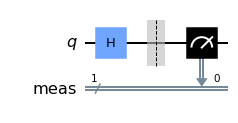

In [2]:
# Prima varianta - 800000 de rulari cu un singur qubit pentru 100000 nr pe 8 biti
# prima oara cu poarta Hadamard, a doua oara cu o rotatie de 90 de grade in jurul axei y
qc_uniform = QuantumCircuit(1) 
qc_uniform.h(0)
qc_uniform.measure_all()
qc_uniform.draw(output='mpl')

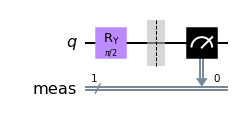

In [58]:
# A doua varianta - Rotatie generica cu 90 de grade in jurul axei y
# NB: se stie ca qubitii din qiskit sunt initializati in starea |0>!
qc_uniform = QuantumCircuit(1)
qc_uniform.ry(math.pi/2, 0)
qc_uniform.measure_all()
qc_uniform.draw(output='mpl')

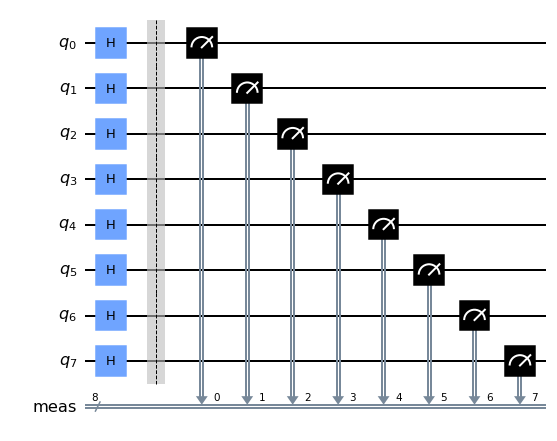

In [3]:
# A treia varianta - Circuit cu 8 qubiti, dar doar cu 100000 de rulari
qc_uniform = QuantumCircuit(8)
qc_uniform.h(range(8))
qc_uniform.measure_all()
qc_uniform.draw(output='mpl')

In [61]:
# La fel si pentru variantele cu rotatie generica si circuit gata implementat:
qc_uniform = QuantumCircuit(8)
qc_uniform.ry(math.pi/2, range(8))
qc_uniform.measure_all()

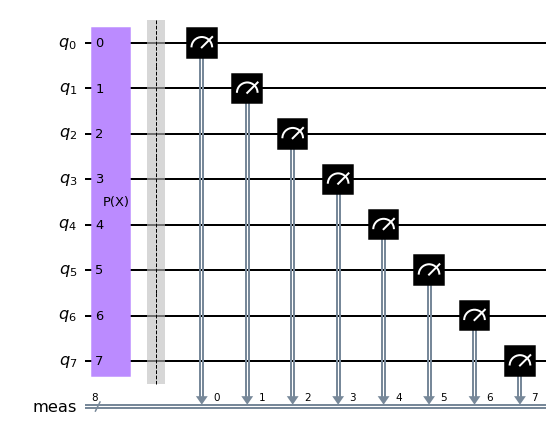

In [62]:
qc_uniform = UniformDistribution(8)
qc_uniform.measure_all()
qc_uniform.draw(output='mpl')

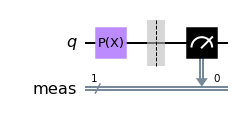

In [52]:
# Varianta gata implementata din qiskit_finance
qc_uniform = UniformDistribution(1)
qc_uniform.measure_all()
qc_uniform.draw(output='mpl')

In [3]:
sim = Aer.get_backend('aer_simulator')
if qc_uniform.num_qubits == 1:
    result1 = sim.run(qc_uniform, shots=800000, memory=True).result()
else:
    result1 = sim.run(qc_uniform, shots=100000, memory=True).result()
counts1 = result1.get_counts()
memory1 = result1.get_memory()

In [4]:
# concatenam bitii aleatori 8 cate 8 pentru a obtine numere pe 8 biti
numbers1 = []
if qc_uniform.num_qubits == 1:
    c = 0
    temp = ''
    for i in range(len(memory1)):
        temp = temp + memory1[i]
        c = c + 1
        if c == 8:
            numbers1.append(temp)
            temp = ''
            c = 0
    numbers1 = [int(x, 2) for x in numbers1]
else:
    numbers1 = memory1
unique_numbers1 = list(set(numbers1))
my_counts1 = {x: numbers1.count(x) for x in unique_numbers1}
df1_data = {"number": my_counts1.keys(), "counts": my_counts1.values()} # dataframe pentru usurinta
df1 = pd.DataFrame.from_dict(df1_data)
df1


,number,counts
0,0,379
1,1,384
2,2,389
3,3,389
4,4,393
...,...,...
251,251,395
252,252,400
253,253,412
254,254,377


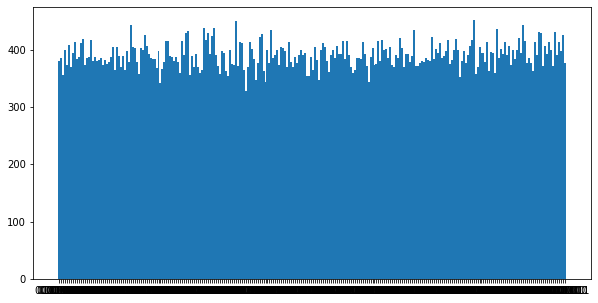

In [6]:
plt.bar(my_counts1.keys(), my_counts1.values(), width=1)
plt.show()

In [5]:
def BoxMuller(u1, u2):
    z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * math.pi * u2)
    return z
    

In [21]:
u1 = np.array(numbers1[:50000])
u2 = np.array(numbers1[50000:])
z = BoxMuller(u1, u2)
z[:50]

C:\Users\STOIAN~1\AppData\Local\Temp/ipykernel_17924/867466741.py:2: RuntimeWarning: divide by zero encountered in log
  z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * math.pi * u2)
C:\Users\STOIAN~1\AppData\Local\Temp/ipykernel_17924/867466741.py:2: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * math.pi * u2)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [18]:
# Normalizare de vector pentru a face posibil testul kologomorov-smirnov
np_numbers1 = np.array(numbers1)
#np_numbers1 = np_numbers1 / np.sqrt(np.sum(np_numbers1 ** 2))
#numbers1[:50]
normalized_numbers = np_numbers1 /np.linalg.norm(np_numbers1)


array([2.98315564e-03, 1.45938549e-03, 4.48546423e-03, 2.79000168e-03,
       1.71692411e-03, 2.01738583e-03, 3.64846373e-04, 2.06030893e-03,
       3.00461719e-03, 3.99184855e-03, 3.84161769e-03, 8.15538952e-04,
       3.92746390e-03, 9.65769811e-04, 3.41238667e-03, 3.02607874e-03,
       8.58462054e-05, 5.00054147e-03, 2.29638600e-03, 4.72154130e-04,
       2.63977082e-03, 6.65308092e-04, 3.06900184e-03, 3.47677132e-03,
       1.07307757e-03, 2.14615514e-04, 4.35669493e-03, 4.48546423e-03,
       1.84569342e-03, 5.00054147e-03, 2.14615514e-03, 1.60961635e-03,
       5.27954163e-03, 2.01738583e-03, 9.44308260e-04, 1.41646239e-03,
       2.33930910e-03, 5.45123404e-03, 1.97446272e-03, 4.29231027e-04,
       5.06492612e-03, 3.04754029e-03, 6.22384989e-04, 3.45530977e-03,
       7.94077400e-04, 1.71692411e-03, 3.17630960e-03, 8.79923606e-04,
       1.97446272e-03, 3.26215581e-03])

## Testul 1: test z vs. distributie uniforma aleatoare intre minim si maxim

In [13]:
dist_uniform = np.random.randint(df1['counts'].min(), df1['counts'].max(), len(df1))
numbers_dist_uniform = range(0, len(dist_uniform))
dict_dist_uniform = {numbers_dist_uniform[i]: dist_uniform[i] for i in range(len(dist_uniform))}
data_dist_uniform = {"number": dict_dist_uniform.keys(), "counts": dict_dist_uniform.values()}
df1_2 = pd.DataFrame.from_dict(data_dist_uniform)
z_calc = (df1['counts'].mean() - df1_2['counts'].mean()) / (math.sqrt(df1.var()['counts'] / len(df1['counts']) + df1_2.var()['counts'] / len(df1_2['counts'])))
z_calc

C:\Users\STOIAN~1\AppData\Local\Temp/ipykernel_1624/2190518823.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_calc = (df1['counts'].mean() - df1_2['counts'].mean()) / (math.sqrt(df1.var()['counts'] / len(df1['counts']) + df1_2.var()['counts'] / len(df1_2['counts'])))


-1.9051136173162218

In [14]:
'''
varianta din biblioteca statsmodels - primul numar este scorul Z, al doilea valoarea p
factor p foarte mic -> se respinge ipoteza nulului => cele doua esantioane sunt suficient de similare
'''
ztest(df1['counts'], df1_2['counts'])

(-1.9051136173162218, 0.056765303677073775)

## Testul 2: test kologomorov-smirnov pentru a compara distributia cu una uniforma

In [15]:
'''
Din pacate, desi testul este cu siguranta cel mai potrivit pentru cerintele mele, 
nu am gasit nici o sursa de explicatie foarte buna a testului pentru a o implementa eu 
Asadar, voi folosi numai implementarea din scipy.stats
Din nou, valoare p mica -> se respinge ipoteza nulului -> 
-> cele doua distributii provin din aceeasi sursa
'''
stats.kstest(df1['counts'], df1_2['counts'])

KstestResult(statistic=0.2265625, pvalue=3.5950283212941483e-06)

# Partea a doua - Distributie normala

## Ruleaza doar una dintre celulele cu circuite de mai jos!

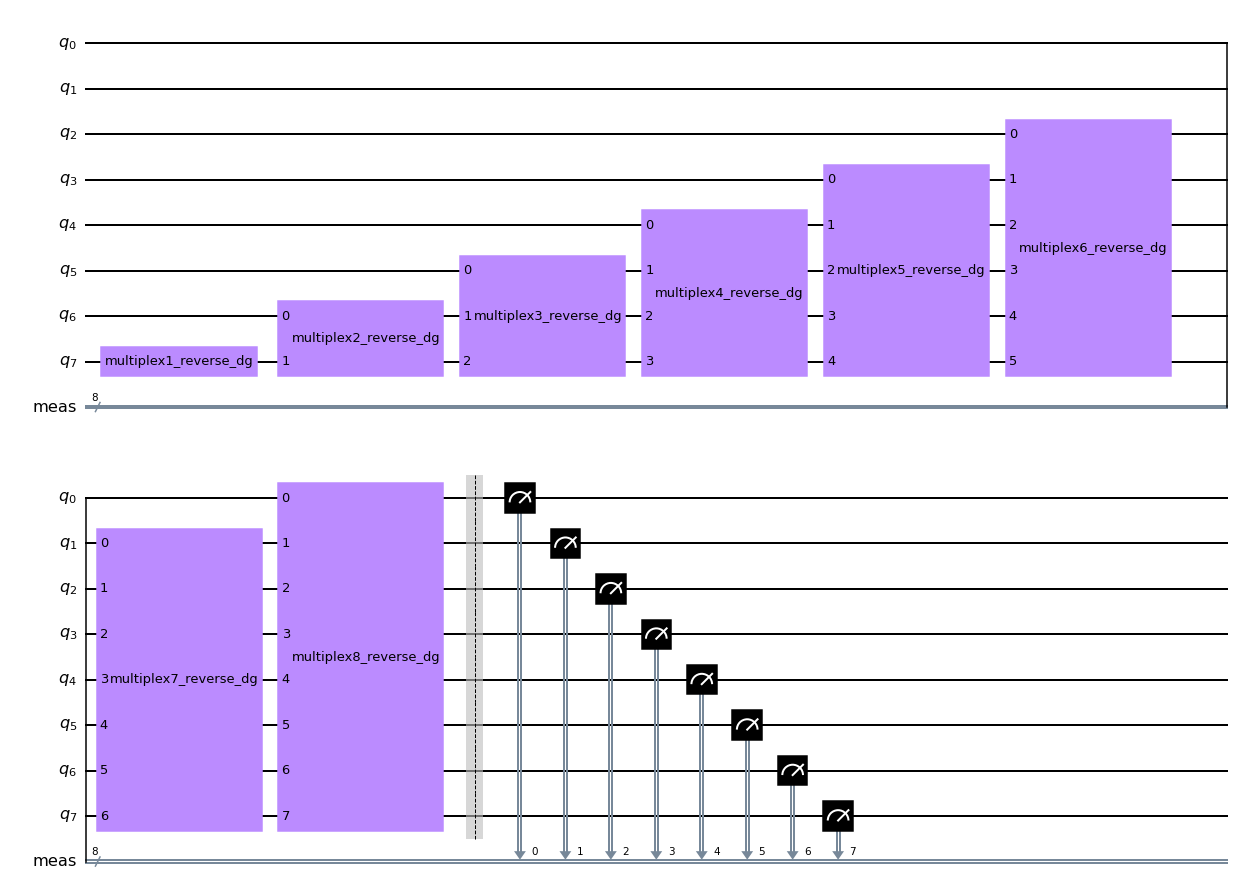

In [16]:
# Prima metoda - metoda "mea"
x = np.linspace(-6, 6, num=2**8)
probabilities = stats.multivariate_normal.pdf(x, 1, 1)
normalized_probabilities = probabilities / np.sum(probabilities)

qc_normal = QuantumCircuit(8)
initial = Initialize(np.sqrt(normalized_probabilities))
distribution = initial.gates_to_uncompute().inverse()
qc_normal.compose(distribution, inplace=True)
qc_normal.measure_all()
qc_normal.draw(output='mpl')

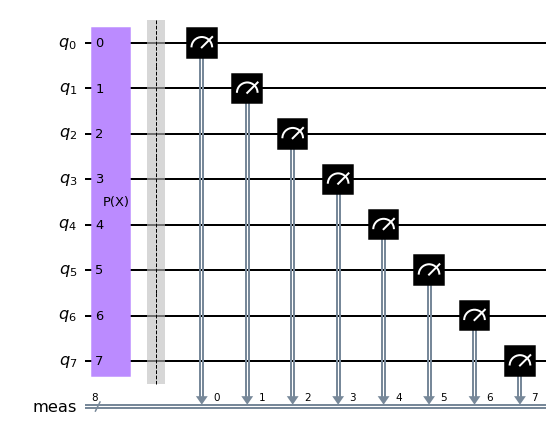

In [74]:
# A doua metoda - Metoda gata implementata din qiskit_finance
qc_normal = NormalDistribution(8, mu=0, sigma=1, bounds=(-6, 6))
qc_normal.measure_all()
qc_normal.draw(output='mpl')

In [18]:
#for i in range(0, qc_normal.depth()**2 + qc_normal.depth()):
#    qc_normal = qc_normal.decompose()
from qiskit import transpile
sim = Aer.get_backend('aer_simulator')
qc_normal = transpile(qc_normal, sim)
result2 = sim.run(qc_normal, shots=100000, memory=True).result()
memory2 = result2.get_memory()
counts2 = result2.get_counts()

In [19]:
numbers2 = [int(x, 2) for x in memory2]
unique_numbers2 = list(set(numbers2))
my_counts2 = {x: numbers2.count(x) for x in unique_numbers2}
df2_data = {"number": my_counts2.keys(), "counts": my_counts2.values()}
df2 = pd.DataFrame.from_dict(df2_data)
df2

,number,counts
0,54,1
1,55,1
2,61,1
3,62,1
4,63,1
...,...,...
165,226,1
166,227,2
167,228,5
168,234,1


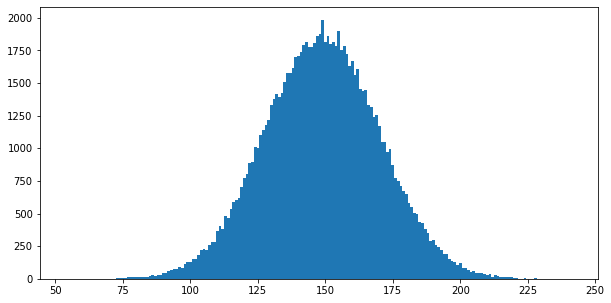

In [20]:
plt.bar(my_counts2.keys(), my_counts2.values(), width=1)
plt.show()

In [88]:
dist_normal = np.random.normal(0, 1, len(df2))
numbers_dist_normal = range(0, len(dist_normal))
dict_dist_normal = {numbers_dist_normal[i]: dist_normal[i] for i in range(len(dist_normal))}
data_dist_normal = {"number": dict_dist_normal.keys(), "counts": dict_dist_normal.values()}
df2_2 = pd.DataFrame.from_dict(data_dist_normal)
z_calc = (df2['counts'].mean() - df2_2['counts'].mean()) / (math.sqrt(df2.var()['counts'] / len(df2['counts']) + df2_2.var()['counts'] / len(df2_2['counts'])))
z_calc

11.623812877435997

In [89]:
dist_normal

array([-1.16043723e+00,  1.65660627e+00, -9.52041139e-01, -9.47121604e-01,
        1.28122504e-01, -6.94517499e-01, -1.12730850e+00,  5.82050300e-01,
        1.61697329e+00, -7.70667482e-01, -2.83393574e-01, -2.80207740e-02,
       -6.80545844e-01,  2.31027762e-01, -7.29922196e-01,  8.04148003e-01,
        1.46009344e+00,  1.47665792e+00, -1.00514572e+00,  9.34329723e-01,
        7.78956308e-01,  1.20878428e+00,  1.55284425e+00,  7.65228069e-02,
       -2.24827979e-01,  1.67009567e+00, -7.48585730e-01, -3.72022495e-01,
        1.82723056e+00, -1.02623120e-02, -3.01579237e-01, -6.66034002e-01,
       -2.69137651e+00, -3.93871470e-01, -2.58735298e-01,  9.45658046e-01,
        1.56703842e-01, -2.63289627e-03, -2.17688145e-01, -4.50409815e-01,
       -1.96242058e-01, -4.33884414e-01,  1.99180987e-01, -6.06016235e-01,
       -2.35725975e-01, -2.86024062e-03,  3.21443971e-01,  1.23371284e-01,
       -1.31762118e+00, -1.38084566e+00, -6.75198716e-01,  3.19397529e-01,
        4.28504033e-01, -

In [90]:
ztest(df2['counts'], df2_2['counts'])

(11.623812877435997, 3.118988588459469e-31)

In [91]:
stats.kstest(df2['counts'], df2_2['counts'])

KstestResult(statistic=0.9226190476190477, pvalue=2.9009625102686475e-77)

In [11]:
from qiskit.compiler import transpile
from qiskit.test.mock import FakeTokyo

backend = FakeTokyo()
optimized_qc_normal = transpile(qc_normal, backend=backend, seed_transpiler=11, optimization_level=2)

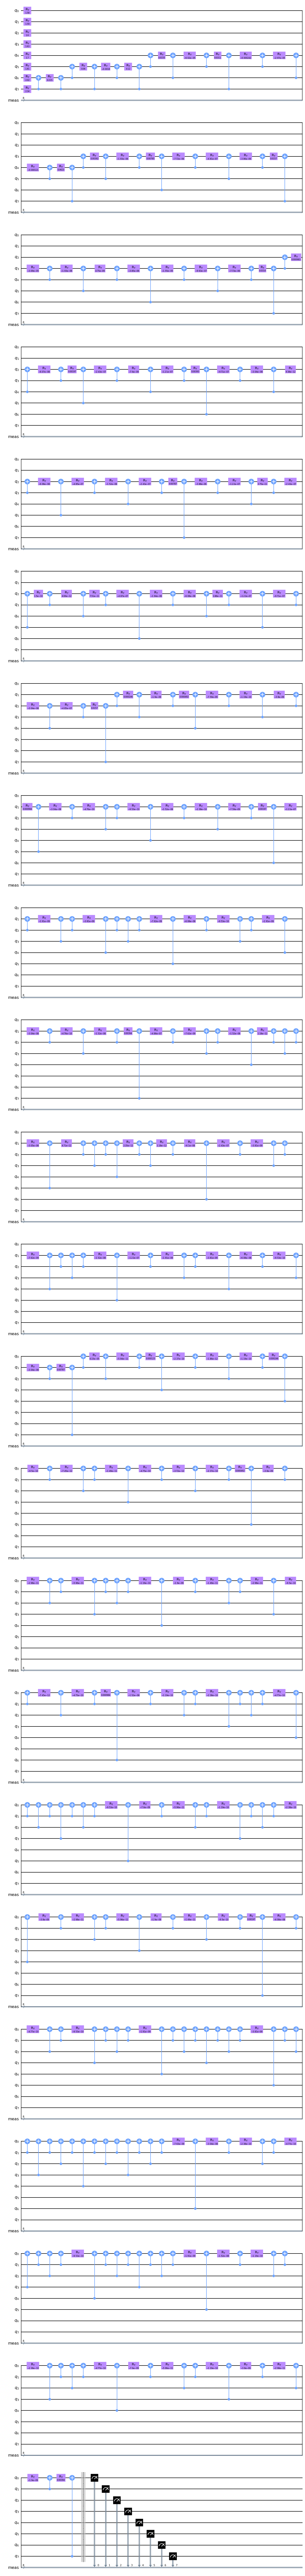

In [18]:
qc_normal.draw(output='mpl')